# Code from Class Annotated

In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/BME574/BME574_HW`


In [2]:
Pkg.add(["Plots"])

   Resolving package versions...
  No Changes to `~/BME574/BME574_HW/Project.toml`
  No Changes to `~/BME574/BME574_HW/Manifest.toml`


In [3]:
using Plots

In [4]:
h = 0.5 #step size
xs = collect(-6:h:6)
ys = collect(-6:h:6)

# make a grid (method only really used for suface plots)
X = [x for x = xs for _ = ys] # create a list of x's iterating over all the y's
Y = [y for _ = xs for y = ys]    

# underscore means the value is not taken, value is ignored

625-element Vector{Float64}:
 -6.0
 -5.5
 -5.0
 -4.5
 -4.0
 -3.5
 -3.0
 -2.5
 -2.0
 -1.5
 -1.0
 -0.5
  0.0
  ⋮
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0
  3.5
  4.0
  4.5
  5.0
  5.5
  6.0

In [5]:
#offset of 1.5 minus an inverted guassian(exponential of some prefactor times a function of x and y)
f0(x,y) = 1.5 - 1.0*exp(-0.03*(3*x^2+y^2))

# a way of defining a function using a tuple
Z = ((x,y) -> begin
        f0(x,y)
    end)
     

#7 (generic function with 1 method)

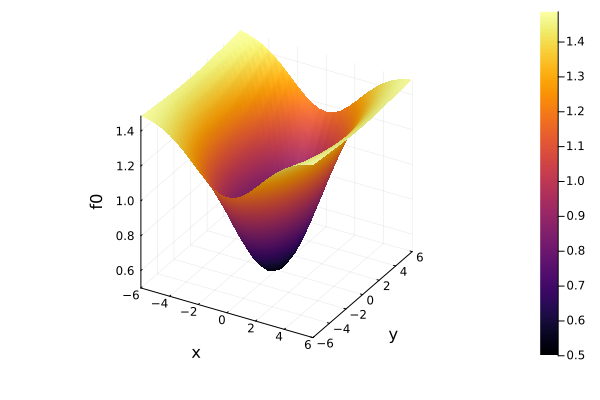

In [6]:
surface(X, Y, Z.(X,Y), xlabel = "x", ylabel = "y", zlabel = "f0")

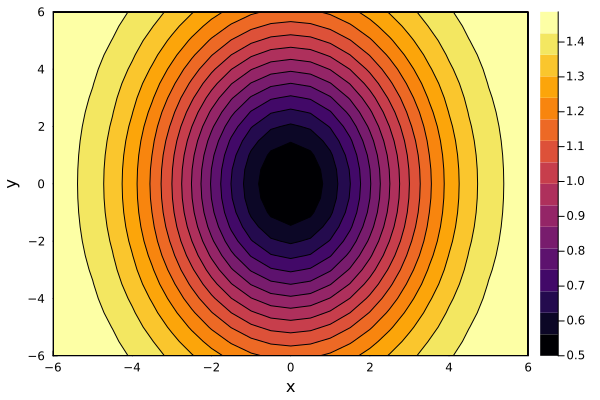

In [7]:
#countour plots can be more useful to look at (same as topographical map)

contourf(xs, ys, f0, xlabel = "x", ylabel = "y", zlabel = "f0")

In [8]:
f(x,y) = 1.5-1.6*exp(-0.05*(3*(x+3).^2+(y+3).^2))
fs(x,y) = f(x,y) + (0.5-exp(-0.1*(3*(x-3).^2+(y-3).^2)))

fs (generic function with 1 method)

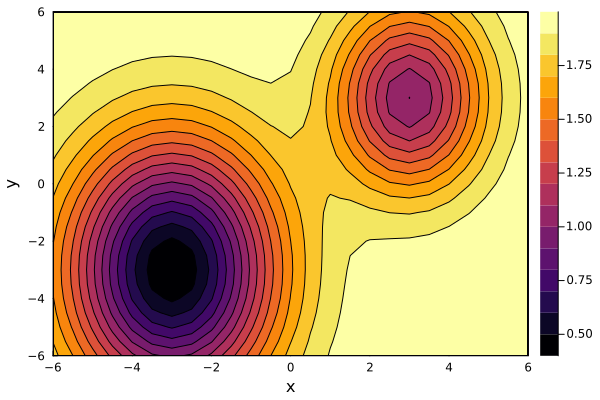

In [9]:
# a large goal is to be able to differntiate / not get stuck in local minimum
# goal to get into flat region where deviations fo parameters don;t matter, no artifcats

contourf(xs, ys, fs, xlabel = "x", ylabel = "y", zlabel = "f0",aspect=:equal)

## Gradient Descent

In [10]:
# our function to descend down (cost function) is described here
fquad(x,y) = x^2 + 3*y^2

fquad (generic function with 1 method)

The gradient of our quadratic cost funciton is described by:

$$\nabla f(\vec x) = \begin{pmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}
\end{pmatrix}	=\begin{pmatrix}
2x \\
6y
\end{pmatrix}	$$

With optimal delta described by the funciton:

$$\delta = \frac{x^2 + 9y^2}{2x^2+54y^2}$$

With each iteration, update x & y from their prior values using the equations:

$$\vec x_{k+1}=\vec x_k - \delta \nabla f(\vec x)$$

$$x_{k+1}=x_k - \delta 2x_k = (1-2\delta)x_k$$
$$y_{k+1}=y_k - \delta 6y_k = (1-6\delta)y_k$$


In [11]:
xc = [3.0]
yc = [2.0]
fc = [fquad(3.0,2.0)]
# run for 10 rounds
# 2 and 6 are the hard-coded derivative coefficients from gradient of f(x)

for j in 1:10
    δ = (xc[end]^2 + 9*yc[end]^2)/(2*xc[end] + 54*yc[end]^2) #evaluate δ from previous x and y
    push!(xc,(1-2*δ)*xc[end]) # evaluate x_k+1
    push!(yc,(1-6*δ)*yc[end]) # evaluate y_k+1
    push!(fc,fquad(xc[end],yc[end]))# evaluate cost function f at x_k+1,y_k+1

    if abs(fc[end]-fc[end-1])<1e-6 #break if convergence criterion met (very small changes in f)
        break
    end
end

In [12]:
# zip pairs lists into tuples
collect(zip(xc, yc))

11-element Vector{Tuple{Float64, Float64}}:
 (3.0, 2.0)
 (1.7837837837837835, -0.43243243243243246)
 (0.5137388832064905, 0.4912365861692354)
 (0.33571884365332627, -0.01943114421935184)
 (0.2230353037547772, 0.0001349613744421102)
 (0.1732905027900615, 4.4657822539913496e-5)
 (0.14326089581505838, 2.144148631303372e-5)
 (0.12273720918597388, 1.2226305643245116e-5)
 (0.10767278581724037, 7.7244374893187e-6)
 (0.09607935664805428, 5.2293023010393166e-6)
 (0.08684811369897824, 3.7220182700309583e-6)

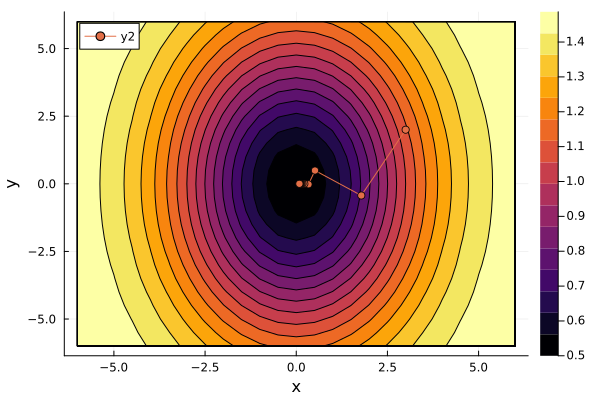

In [13]:
# goes down hill in most efficient way
# show decent down contour plot
contourf(xs, ys, f0, xlabel = "x", ylabel = "y", zlabel = "f0")
plot!(xc, yc, markershape = :circle, aspect=:equal)

***
***

# HW

Please use the example from class (GradientDecent.ipynb), and implement the gradient decent algorithm with the Decent() method from Optimization.jl and OptimizationOptimJL.jl .  Look in the documentation on how to implement a callback function that is called after each iteration to collect the path to the minimum.  Also, you need to specify how Decent is calculating the gradient.  I suggest to use ForwardDiff.jl and specify the gradient method as AutoForwardDiff().  That should work.  Let me know if you encounter difficulties.

In [14]:
import Pkg
Pkg.activate(".")

  Activating project at `~/BME574/BME574_HW`


In [15]:
Pkg.add(["Plots","Optimization","OptimizationOptimJL","ForwardDiff"])

   Resolving package versions...
  No Changes to `~/BME574/BME574_HW/Project.toml`
  No Changes to `~/BME574/BME574_HW/Manifest.toml`


In [16]:
using Plots, Optimization, OptimizationOptimJL, ForwardDiff

In [17]:
?Optimization

search: Optimization OptimizationBase OptimizationTrace OptimizationState



# Optimization.jl

[![Join the chat at https://julialang.zulipchat.com #sciml-bridged](https://img.shields.io/static/v1?label=Zulip&message=chat&color=9558b2&labelColor=389826)](https://julialang.zulipchat.com/#narrow/stream/279055-sciml-bridged) [![Global Docs](https://img.shields.io/badge/docs-SciML-blue.svg)](https://docs.sciml.ai/Optimization/stable/)

[![codecov](https://codecov.io/gh/SciML/Optimization.jl/branch/master/graph/badge.svg)](https://codecov.io/gh/SciML/Optimization.jl) [![Build Status](https://github.com/SciML/Optimization.jl/workflows/CI/badge.svg)](https://github.com/SciML/Optimization.jl/actions?query=workflow%3ACI)

[![ColPrac: Contributor's Guide on Collaborative Practices for Community Packages](https://img.shields.io/badge/ColPrac-Contributor%27s%20Guide-blueviolet)](https://github.com/SciML/ColPrac) [![SciML Code Style](https://img.shields.io/static/v1?label=code%20style&message=SciML&color=9558b2&labelColor=389826)](https://github.com/SciML/SciMLStyle)

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7738525.svg)](https://doi.org/10.5281/zenodo.7738525)

Optimization.jl is a package with a scope that is beyond your normal global optimization package. Optimization.jl seeks to bring together all of the optimization packages it can find, local and global, into one unified Julia interface. This means, you learn one package and you learn them all! Optimization.jl adds a few high-level features, such as integrating with automatic differentiation, to make its usage fairly simple for most cases, while allowing all of the options in a single unified interface.

## Installation

Assuming that you already have Julia correctly installed, it suffices to import Optimization.jl in the standard way:

```julia
using Pkg
Pkg.add("Optimization")
```

The packages relevant to the core functionality of Optimization.jl will be imported accordingly and, in most cases, you do not have to worry about the manual installation of dependencies. Below is the list of packages that need to be installed explicitly if you intend to use the specific optimization algorithms offered by them:

  * OptimizationBBO for [BlackBoxOptim.jl](https://github.com/robertfeldt/BlackBoxOptim.jl)
  * OptimizationEvolutionary for [Evolutionary.jl](https://github.com/wildart/Evolutionary.jl) (see also [this documentation](https://wildart.github.io/Evolutionary.jl/dev/))
  * OptimizationGCMAES for [GCMAES.jl](https://github.com/AStupidBear/GCMAES.jl)
  * OptimizationMOI for [MathOptInterface.jl](https://github.com/jump-dev/MathOptInterface.jl) (usage of algorithm via MathOptInterface API; see also the API [documentation](https://jump.dev/MathOptInterface.jl/stable/))
  * OptimizationMetaheuristics for [Metaheuristics.jl](https://github.com/jmejia8/Metaheuristics.jl) (see also [this documentation](https://jmejia8.github.io/Metaheuristics.jl/stable/))
  * OptimizationMultistartOptimization for [MultistartOptimization.jl](https://github.com/tpapp/MultistartOptimization.jl) (see also [this documentation](https://juliahub.com/docs/MultistartOptimization/cVZvi/0.1.0/))
  * OptimizationNLopt for [NLopt.jl](https://github.com/JuliaOpt/NLopt.jl) (usage via the NLopt API; see also the available [algorithms](https://nlopt.readthedocs.io/en/latest/NLopt_Algorithms/))
  * OptimizationNOMAD for [NOMAD.jl](https://github.com/bbopt/NOMAD.jl) (see also [this documentation](https://bbopt.github.io/NOMAD.jl/stable/))
  * OptimizationNonconvex for [Nonconvex.jl](https://github.com/JuliaNonconvex/Nonconvex.jl) (see also [this documentation](https://julianonconvex.github.io/Nonconvex.jl/stable/))
  * OptimizationQuadDIRECT for [QuadDIRECT.jl](https://github.com/timholy/QuadDIRECT.jl)
  * OptimizationSpeedMapping for [SpeedMapping.jl](https://github.com/NicolasL-S/SpeedMapping.jl) (see also [this documentation](https://nicolasl-s.github.io/SpeedMapping.jl/stable/))

## Tutorials and Documentation

For information on using the package, [see the stable documentation](https://docs.sciml.ai/Optimization/stable/). Use the [in-development documentation](https://docs.sciml.ai/Optimization/dev/) for the version of the documentation, which contains the unreleased features.

## Examples

```julia
using Optimization
rosenbrock(x, p) = (p[1] - x[1])^2 + p[2] * (x[2] - x[1]^2)^2
x0 = zeros(2)
p = [1.0, 100.0]

prob = OptimizationProblem(rosenbrock, x0, p)

using OptimizationOptimJL
sol = solve(prob, NelderMead())

using OptimizationBBO
prob = OptimizationProblem(rosenbrock, x0, p, lb = [-1.0, -1.0], ub = [1.0, 1.0])
sol = solve(prob, BBO_adaptive_de_rand_1_bin_radiuslimited())
```

Note that Optim.jl is a core dependency of Optimization.jl. However, BlackBoxOptim.jl is not and must already be installed (see the list above).

*Warning:* The output of the second optimization task (`BBO_adaptive_de_rand_1_bin_radiuslimited()`) is currently misleading in the sense that it returns `Status: failure (reached maximum number of iterations)`. However, convergence is actually reached and the confusing message stems from the reliance on the Optim.jl output struct (where the situation of reaching the maximum number of iterations is rightly regarded as a failure). The improved output struct will soon be implemented.

The output of the first optimization task (with the `NelderMead()` algorithm) is given below:

```
* Status: success

* Candidate solution
   Final objective value:     3.525527e-09

* Found with
   Algorithm:     Nelder-Mead

* Convergence measures
   √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

* Work counters
   Seconds run:   0  (vs limit Inf)
   Iterations:    60
   f(x) calls:    118
```

We can also explore other methods in a similar way:

```julia
using ForwardDiff
f = OptimizationFunction(rosenbrock, Optimization.AutoForwardDiff())
prob = OptimizationProblem(f, x0, p)
sol = solve(prob, BFGS())
```

For instance, the above optimization task produces the following output:

```
* Status: success

* Candidate solution
   Final objective value:     7.645684e-21

* Found with
   Algorithm:     BFGS

* Convergence measures
   |x - x'|               = 3.48e-07 ≰ 0.0e+00
   |x - x'|/|x'|          = 3.48e-07 ≰ 0.0e+00
   |f(x) - f(x')|         = 6.91e-14 ≰ 0.0e+00
   |f(x) - f(x')|/|f(x')| = 9.03e+06 ≰ 0.0e+00
   |g(x)|                 = 2.32e-09 ≤ 1.0e-08

* Work counters
   Seconds run:   0  (vs limit Inf)
   Iterations:    16
   f(x) calls:    53
   ∇f(x) calls:   53
```

```julia
prob = OptimizationProblem(f, x0, p, lb = [-1.0, -1.0], ub = [1.0, 1.0])
sol = solve(prob, Fminbox(GradientDescent()))
```

The examples clearly demonstrate that Optimization.jl provides an intuitive way of specifying optimization tasks and offers a relatively easy access to a wide range of optimization algorithms.


Searching the stable documnetation for decent, can arrive at Optim.jl page which has the installation name of OptimizationOptimJL.

Here there is a listed function: Optim.GradientDescent()

In [18]:
?Optim.GradientDescent()

# Gradient Descent

## Constructor

```julia
GradientDescent(; alphaguess = LineSearches.InitialHagerZhang(),
linesearch = LineSearches.HagerZhang(),
P = nothing,
precondprep = (P, x) -> nothing)
```

Keywords are used to control choice of line search, and preconditioning.

## Description

The `GradientDescent` method is a simple gradient descent algorithm, that is the search direction is simply the negative gradient at the current iterate, and then a line search step is used to compute the final step. See Nocedal and Wright (ch. 2.2, 1999) for an explanation of the approach.

## References

  * Nocedal, J. and Wright, S. J. (1999), Numerical optimization. Springer Science 35.67-68: 7.


In [19]:
?AutoForwardDiff()

```
AutoForwardDiff{chunksize,T}
```

Struct used to select the [ForwardDiff.jl](https://github.com/JuliaDiff/ForwardDiff.jl) backend for automatic differentiation.

Defined by [ADTypes.jl](https://github.com/SciML/ADTypes.jl).

# Constructors

```
AutoForwardDiff(; chunksize=nothing, tag=nothing)
```

# Type parameters

  * `chunksize`: the preferred [chunk size](https://juliadiff.org/ForwardDiff.jl/stable/user/advanced/#Configuring-Chunk-Size) to evaluate several derivatives at once

# Fields

  * `tag::T`: a [custom tag](https://juliadiff.org/ForwardDiff.jl/release-0.10/user/advanced.html#Custom-tags-and-tag-checking-1) to handle nested differentiation calls (usually not necessary)

---

```
AutoForwardDiff{chunksize} <: AbstractADType
```

An AbstractADType choice for use in OptimizationFunction for automatically generating the unspecified derivative functions. Usage:

```julia
OptimizationFunction(f, AutoForwardDiff(); kwargs...)
```

This uses the [ForwardDiff.jl](https://github.com/JuliaDiff/ForwardDiff.jl) package. It is the fastest choice for small systems, especially with heavy scalar interactions. It is easy to use and compatible with most Julia functions which have loose type restrictions. However, because it's forward-mode, it scales poorly in comparison to other AD choices. Hessian construction is suboptimal as it uses the forward-over-forward approach.

  * Compatible with GPUs
  * Compatible with Hessian-based optimization
  * Compatible with Hv-based optimization
  * Compatible with constraints

Note that only the unspecified derivative functions are defined. For example, if a `hess` function is supplied to the `OptimizationFunction`, then the Hessian is not defined via ForwardDiff.


### Utilize the Gradient Descent funcction from Optimization Library

In [20]:
# Define our cost function again, let X represent a vector of our inputs x and y
f(X) = X[1]^2 + 3*(X[2]^2)

# Initial x and y values
u0 = [3.0, 2.0]

# result = optimize(f, u0, Optim.GradientDescent(), autodiff=AutoForwardDiff()) 
# this didn't work for specifying autoforward so I used the symbol instead

result = optimize(f, u0, Optim.GradientDescent(), autodiff=:forward)

 * Status: success

 * Candidate solution
    Final objective value:     2.813093e-18

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 2.01e-09 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.25e+00 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.32e-17 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.69e+00 ≰ 0.0e+00
    |g(x)|                 = 3.22e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    25
    f(x) calls:    63
    ∇f(x) calls:   63
